In [247]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

directory_path = "C:\\Jayesh Personal"
json_filename = "clinical.project-tcga-coad.json"
full_file_path = os.path.join(directory_path, json_filename)

try:
    with open(full_file_path, 'r') as file:
        data = json.load(file)
        print("JSON data loaded successfully:")
        print(data)
except FileNotFoundError:
    print(f"Error: The file '{full_file_path}' was not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from '{full_file_path}'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

JSON data loaded successfully:
[{'lost_to_followup': 'Yes', 'disease_type': 'Adenomas and Adenocarcinomas', 'project': {'project_id': 'TCGA-COAD'}, 'submitter_id': 'TCGA-F4-6854', 'days_to_consent': -1, 'diagnoses': [{'synchronous_malignancy': 'No', 'ajcc_pathologic_stage': 'Stage IIA', 'days_to_diagnosis': 0, 'treatments': [{'treatment_intent_type': 'Adjuvant', 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-F4-6854_treatment', 'treatment_id': 'c2edb8f2-f179-553e-b7a5-a3b40248bf6d', 'treatment_type': 'Pharmaceutical Therapy, NOS', 'state': 'released', 'treatment_or_therapy': 'no'}, {'treatment_intent_type': 'Adjuvant', 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-F4-6854_treatment2', 'treatment_id': 'de495a10-c532-4507-8ae6-ea7822b3e04e', 'treatment_type': 'Radiation Therapy, NOS', 'state': 'released', 'treatment_or_therapy': 'no', 'created_datetime': '2025-01-07T10:27:34.716651-06:00'}], 'tissue_or_organ_of_origin': 'Sigm

In [248]:
# Flatten only first-level nesting
flat_data = []

for person in data:
    flat_row = {}

    for key, value in person.items():
        if isinstance(value, dict):
            # For dicts like 'demographic' or 'project', flatten keys
            for subkey, subval in value.items():
                flat_row[f"{key}.{subkey}"] = subval
        elif isinstance(value, list):
            # Leave lists as-is (we'll handle them in later steps)
            flat_row[key] = value
        else:
            flat_row[key] = value

    flat_data.append(flat_row)

# Convert to DataFrame
clinical_df = pd.DataFrame(flat_data)

In [249]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,updated_datetime,case_id,follow_ups,index_date,state,family_histories,demographic.days_to_death,demographic.created_datetime,exposures,demographic.year_of_birth
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,2025-01-07T10:27:34.716651-06:00,01240896-3f3f-4bf9-9799-55c87bfacf36,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,NaN,NaN,NaN,NaN,NaN
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,2025-01-07T10:40:06.832507-06:00,01ad5016-f691-4bca-82a0-910429d8d25b,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,2025-01-07T11:14:57.553876-06:00,01f493d4-229d-47a6-baa8-32a342c65d01,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,2025-01-07T11:34:26.696867-06:00,022f39e9-57ee-4b2b-8b3a-8929e3d69a37,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,"[{'relative_with_cancer_history': 'yes', 'upda...",1094.0,NaN,NaN,NaN
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,2025-01-07T11:12:21.907599-06:00,02f9668c-71e6-485f-88b1-b37dc8bdd2ab,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,2025-01-07T10:51:18.077934-06:00,fce1fd5a-54d2-4260-b187-4eb7035e96e9,"[{'days_to_recurrence': 337, 'timepoint_catego...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,2025-01-07T11:03:42.741532-06:00,fd16b634-2e04-44a3-862d-fb03cd73c057,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,2025-01-07T11:15:35.523061-06:00,fdffda5f-72b2-4153-b7f1-d7043b7ca898,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",30.0,NaN,NaN,NaN
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,2025-01-07T11:32:54.772468-06:00,ff1407c6-9174-4bae-a19b-d34ca71b898c,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_histor

In [250]:
clinical_df.to_csv('step_one.csv', index=False)

In [251]:
# Extract 'synchronous_malignancy' from the first diagnosis (if present)
clinical_df['diagnosis.synchronous_malignancy'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('synchronous_malignancy') if isinstance(d, list) and len(d) > 0 else None
)

In [252]:
clinical_df['diagnosis.pathologic_stage'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('ajcc_pathologic_stage') if isinstance(d, list) and len(d) > 0 else None
)

In [253]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,follow_ups,index_date,state,family_histories,demographic.days_to_death,demographic.created_datetime,exposures,demographic.year_of_birth,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,NaN,NaN,NaN,NaN,NaN,No,Stage IIA
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,No,Stage IIA
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,No,Stage IIIC
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,"[{'relative_with_cancer_history': 'yes', 'upda...",1094.0,NaN,NaN,NaN,No,Stage IIIB
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,No,Stage I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,"[{'days_to_recurrence': 337, 'timepoint_catego...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,None,None
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,None,None
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",30.0,NaN,NaN,NaN,No,Stage IIA
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,"[{'relative_with_cancer_history': 'no', 'updat...",NaN,NaN,NaN,NaN,No,Stage II


In [254]:
[{'synchronous_malignancy': 'No', 'ajcc_pathologic_stage': 'Stage IIIC', 'days_to_diagnosis': 0, 'treatments': [{'treatment_intent_type': 'Adjuvant', 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-AA-A00O_treatment2', 'treatment_id': '3817f806-d8b1-448c-9def-36e16b2cb041', 'treatment_type': 'Radiation Therapy, NOS', 'state': 'released', 'treatment_or_therapy': 'no', 'created_datetime': '2025-01-07T11:14:57.553876-06:00'}, {'treatment_intent_type': 'Adjuvant', 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-AA-A00O_treatment', 'treatment_id': 'd04b2b03-119d-5e18-bf1e-9bfcb97efa06', 'treatment_type': 'Pharmaceutical Therapy, NOS', 'state': 'released', 'treatment_or_therapy': 'no'}], 'tissue_or_organ_of_origin': 'Sigmoid colon', 'days_to_last_follow_up': 822.0, 'age_at_diagnosis': 30316, 'primary_diagnosis': 'Adenocarcinoma, NOS', 'updated_datetime': '2025-03-26T09:16:18.292489-05:00', 'prior_malignancy': 'no', 'year_of_diagnosis': 2008, 'prior_treatment': 'No', 'state': 'released', 'diagnosis_is_primary_disease': 'true', 'ajcc_staging_system_edition': '6th', 'ajcc_pathologic_t': 'T3', 'morphology': '8140/3', 'ajcc_pathologic_n': 'N2', 'ajcc_pathologic_m': 'M0', 'submitter_id': 'TCGA-AA-A00O_diagnosis', 'classification_of_tumor': 'primary', 'residual_disease': 'R0', 'pathology_details': [{'consistent_pathology_review': 'Yes', 'pathology_detail_id': '56968b1c-040d-4bc8-99a4-49d519e3482a', 'lymph_nodes_positive': 32, 'lymph_nodes_tested': 40, 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-AA-A00O_pathology_detail', 'vascular_invasion_present': 'No', 'lymphatic_invasion_present': 'Yes', 'state': 'released', 'created_datetime': '2025-01-07T11:14:57.553876-06:00'}], 'diagnosis_id': '5294556a-13c8-5e63-9b3b-6ac0b429aa77', 'icd_10_code': 'C18.7', 'site_of_resection_or_biopsy': 'Sigmoid colon'}]

[{'synchronous_malignancy': 'No',
  'ajcc_pathologic_stage': 'Stage IIIC',
  'days_to_diagnosis': 0,
  'treatments': [{'treatment_intent_type': 'Adjuvant',
    'updated_datetime': '2025-01-08T13:02:44.837804-06:00',
    'submitter_id': 'TCGA-AA-A00O_treatment2',
    'treatment_id': '3817f806-d8b1-448c-9def-36e16b2cb041',
    'treatment_type': 'Radiation Therapy, NOS',
    'state': 'released',
    'treatment_or_therapy': 'no',
    'created_datetime': '2025-01-07T11:14:57.553876-06:00'},
   {'treatment_intent_type': 'Adjuvant',
    'updated_datetime': '2025-01-08T13:02:44.837804-06:00',
    'submitter_id': 'TCGA-AA-A00O_treatment',
    'treatment_id': 'd04b2b03-119d-5e18-bf1e-9bfcb97efa06',
    'treatment_type': 'Pharmaceutical Therapy, NOS',
    'state': 'released',
    'treatment_or_therapy': 'no'}],
  'tissue_or_organ_of_origin': 'Sigmoid colon',
  'days_to_last_follow_up': 822.0,
  'age_at_diagnosis': 30316,
  'primary_diagnosis': 'Adenocarcinoma, NOS',
  'updated_datetime': '2025-03

In [255]:
clinical_df['diagnosis.organ_of_origin'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('tissue_or_organ_of_origin') if isinstance(d, list) and len(d) > 0 else None
)

In [256]:
clinical_df['diagnosis.primary_diagnosis'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('primary_diagnosis') if isinstance(d, list) and len(d) > 0 else None
)

In [257]:
clinical_df['diagnosis.prior_malignancy'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('prior_malignancy') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.year_of_diagnosis'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('year_of_diagnosis') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.prior_treatment'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('prior_treatment') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.state'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('state') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.is_primary_disease'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('diagnosis_is_primary_disease') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.ajcc_edition'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('ajcc_staging_system_edition') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.ajcc_t'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('ajcc_pathologic_t') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.morphology'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('morphology') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.ajcc_n'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('ajcc_pathologic_n') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.ajcc_m'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('ajcc_pathologic_m') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.submitter_id'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('submitter_id') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.classification'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('classification_of_tumor') if isinstance(d, list) and d else None
)

clinical_df['diagnosis.residual_disease'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('residual_disease') if isinstance(d, list) and d else None
)

In [258]:
clinical_df['treatments'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('treatments') if isinstance(d, list) and d else None
)

In [259]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,diagnosis.is_primary_disease,diagnosis.ajcc_edition,diagnosis.ajcc_t,diagnosis.morphology,diagnosis.ajcc_n,diagnosis.ajcc_m,diagnosis.submitter_id,diagnosis.classification,diagnosis.residual_disease,treatments
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,true,7th,T3,8140/3,N0,M0,TCGA-F4-6854_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update..."
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,true,6th,T3,8140/3,N0,M0,TCGA-AA-3561_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update..."
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,true,6th,T3,8140/3,N2,M0,TCGA-AA-A00O_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update..."
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,true,6th,T3,8140/3,N1,M0,TCGA-DM-A28F_diagnosis,primary,None,None
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,true,5th,T2,8140/3,N0,M0,TCGA-AA-3866_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,false,None,None,Not Reported,None,None,TCGA-CM-6675_diagnosis2,Unknown,None,[{'updated_datetime': '2025-01-08T13:02:44.837...
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,false,None,None,9732/3,None,None,TCGA-AA-3556_diagnosis2,Prior primary,None,[{'updated_datetime': '2025-01-08T13:02:44.837...
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,true,6th,T3,8140/3,N0,M0,TCGA-AA-3818_diagnosis,primary,R0,None
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,true,6th,T3,8140/3,N0,M0,TCGA-A6-2680_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update..."


In [260]:
clinical_df['treatment.intent_type'] = clinical_df['treatments'].apply(
    lambda t: t[0].get('treatment_intent_type') if isinstance(t, list) and t else None
)

clinical_df['treatment.type'] = clinical_df['treatments'].apply(
    lambda t: t[0].get('treatment_type') if isinstance(t, list) and t else None
)

clinical_df['treatment.state'] = clinical_df['treatments'].apply(
    lambda t: t[0].get('state') if isinstance(t, list) and t else None
)

clinical_df['treatment.therapy_flag'] = clinical_df['treatments'].apply(
    lambda t: t[0].get('treatment_or_therapy') if isinstance(t, list) and t else None
)

In [261]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,diagnosis.ajcc_n,diagnosis.ajcc_m,diagnosis.submitter_id,diagnosis.classification,diagnosis.residual_disease,treatments,treatment.intent_type,treatment.type,treatment.state,treatment.therapy_flag
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,N0,M0,TCGA-F4-6854_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Pharmaceutical Therapy, NOS",released,no
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,N0,M0,TCGA-AA-3561_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Pharmaceutical Therapy, NOS",released,no
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,N2,M0,TCGA-AA-A00O_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,N1,M0,TCGA-DM-A28F_diagnosis,primary,None,None,None,None,None,None
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,N0,M0,TCGA-AA-3866_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,None,None,TCGA-CM-6675_diagnosis2,Unknown,None,[{'updated_datetime': '2025-01-08T13:02:44.837...,None,"Pharmaceutical Therapy, NOS",released,yes
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,None,None,TCGA-AA-3556_diagnosis2,Prior primary,None,[{'updated_datetime': '2025-01-08T13:02:44.837...,None,"Radiation Therapy, NOS",released,no
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,N0,M0,TCGA-AA-3818_diagnosis,primary,R0,None,None,None,None,None
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,N0,M0,TCGA-A6-2680_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no


In [262]:
clinical_df['pathology_details'] = clinical_df['diagnoses'].apply(
    lambda d: d[0].get('pathology_details') if isinstance(d, list) and len(d) > 0 else None
)

In [263]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,diagnosis.ajcc_m,diagnosis.submitter_id,diagnosis.classification,diagnosis.residual_disease,treatments,treatment.intent_type,treatment.type,treatment.state,treatment.therapy_flag,pathology_details
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,M0,TCGA-F4-6854_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Pharmaceutical Therapy, NOS",released,no,"[{'consistent_pathology_review': 'Yes', 'patho..."
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,M0,TCGA-AA-3561_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Pharmaceutical Therapy, NOS",released,no,[{'consistent_pathology_review': 'Not Reported...
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,M0,TCGA-AA-A00O_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no,"[{'consistent_pathology_review': 'Yes', 'patho..."
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,M0,TCGA-DM-A28F_diagnosis,primary,None,None,None,None,None,None,"[{'consistent_pathology_review': 'Yes', 'patho..."
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,M0,TCGA-AA-3866_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no,[{'consistent_pathology_review': 'Not Reported...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,None,TCGA-CM-6675_diagnosis2,Unknown,None,[{'updated_datetime': '2025-01-08T13:02:44.837...,None,"Pharmaceutical Therapy, NOS",released,yes,None
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,None,TCGA-AA-3556_diagnosis2,Prior primary,None,[{'updated_datetime': '2025-01-08T13:02:44.837...,None,"Radiation Therapy, NOS",released,no,None
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,M0,TCGA-AA-3818_diagnosis,primary,R0,None,None,None,None,None,[{'consistent_pathology_review': 'Not Reported...
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,M0,TCGA-A6-2680_diagnosis,primary,R0,"[{'treatment_intent_type': 'Adjuvant', 'update...",Adjuvant,"Radiation Therapy, NOS",released,no,"[{'consistent_pathology_review': 'Yes', 'patho..."


In [264]:
clinical_df['pathology.consistent_review'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('consistent_pathology_review') if isinstance(p, list) and p else None
)

clinical_df['pathology.lymph_nodes_positive'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('lymph_nodes_positive') if isinstance(p, list) and p else None
)

clinical_df['pathology.lymph_nodes_tested'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('lymph_nodes_tested') if isinstance(p, list) and p else None
)

clinical_df['pathology.updated_datetime'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('updated_datetime') if isinstance(p, list) and p else None
)

clinical_df['pathology.vascular_invasion'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('vascular_invasion_present') if isinstance(p, list) and p else None
)

clinical_df['pathology.lymphatic_invasion'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('lymphatic_invasion_present') if isinstance(p, list) and p else None
)

clinical_df['pathology.state'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('state') if isinstance(p, list) and p else None
)

clinical_df['pathology.created_datetime'] = clinical_df['pathology_details'].apply(
    lambda p: p[0].get('created_datetime') if isinstance(p, list) and p else None
)

In [265]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,treatment.therapy_flag,pathology_details,pathology.consistent_review,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.updated_datetime,pathology.vascular_invasion,pathology.lymphatic_invasion,pathology.state,pathology.created_datetime
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,no,"[{'consistent_pathology_review': 'Yes', 'patho...",Yes,0.0,8.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T10:27:34.716651-06:00
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,no,[{'consistent_pathology_review': 'Not Reported...,Not Reported,NaN,50.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T10:40:06.832507-06:00
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,no,"[{'consistent_pathology_review': 'Yes', 'patho...",Yes,32.0,40.0,2025-01-08T13:02:44.837804-06:00,No,Yes,released,2025-01-07T11:14:57.553876-06:00
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,None,"[{'consistent_pathology_review': 'Yes', 'patho...",Yes,1.0,23.0,2025-01-08T13:02:44.837804-06:00,None,None,released,2025-01-07T11:34:26.696867-06:00
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,no,[{'consistent_pathology_review': 'Not Reported...,Not Reported,0.0,23.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:12:21.907599-06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,yes,None,None,NaN,NaN,None,None,None,None,None
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,no,None,None,NaN,NaN,None,None,None,None,None
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,None,[{'consistent_pathology_review': 'Not Reported...,Not Reported,0.0,18.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:15:35.523061-06:00
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,no,"[{'consistent_pathology_review': 'Yes', 'patho...",Yes,0.0,34.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:32:54.772468-06:00


In [266]:
clinical_df['primary_site'].unique()

array(['Colon', 'Rectosigmoid junction'], dtype=object)

In [267]:
clinical_df.to_csv("a_bit_cleaned.csv", index=False)

In [268]:
[{'relative_with_cancer_history': 'no', 'updated_datetime': '2025-01-08T13:02:44.837804-06:00', 'submitter_id': 'TCGA-AA-3561_family_history', 'state': 'released', 'relationship_primary_diagnosis': 'Cancer', 'created_datetime': '2025-01-07T10:40:06.832507-06:00', 'family_history_id': 'eb4fea37-fc5e-4e45-82c7-1194b757b1b8'}]

[{'relative_with_cancer_history': 'no',
  'updated_datetime': '2025-01-08T13:02:44.837804-06:00',
  'submitter_id': 'TCGA-AA-3561_family_history',
  'state': 'released',
  'relationship_primary_diagnosis': 'Cancer',
  'created_datetime': '2025-01-07T10:40:06.832507-06:00',
  'family_history_id': 'eb4fea37-fc5e-4e45-82c7-1194b757b1b8'}]

In [269]:
clinical_df['family.relative_with_cancer'] = clinical_df['family_histories'].apply(
    lambda f: f[0].get('relative_with_cancer_history') if isinstance(f, list) and f else None
)

clinical_df['family.cancer_history_count'] = clinical_df['family_histories'].apply(
    lambda f: f[0].get('relatives_with_cancer_history_count') if isinstance(f, list) and f else None
)

clinical_df['family.state'] = clinical_df['family_histories'].apply(
    lambda f: f[0].get('state') if isinstance(f, list) and f else None
)

clinical_df['family.primary_diagnosis'] = clinical_df['family_histories'].apply(
    lambda f: f[0].get('relationship_primary_diagnosis') if isinstance(f, list) and f else None
)

In [270]:
clinical_df

,lost_to_followup,disease_type,project.project_id,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,pathology.lymph_nodes_tested,pathology.updated_datetime,pathology.vascular_invasion,pathology.lymphatic_invasion,pathology.state,pathology.created_datetime,family.relative_with_cancer,family.cancer_history_count,family.state,family.primary_diagnosis
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,8.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T10:27:34.716651-06:00,None,NaN,None,None
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,50.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T10:40:06.832507-06:00,no,NaN,released,Cancer
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,40.0,2025-01-08T13:02:44.837804-06:00,No,Yes,released,2025-01-07T11:14:57.553876-06:00,no,NaN,released,Cancer
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,23.0,2025-01-08T13:02:44.837804-06:00,None,None,released,2025-01-07T11:34:26.696867-06:00,yes,2.0,released,Cancer
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,23.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:12:21.907599-06:00,no,NaN,released,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,NaN,None,None,None,None,None,no,NaN,released,Cancer
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,NaN,None,None,None,None,None,no,NaN,released,Cancer
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,18.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:15:35.523061-06:00,no,NaN,released,Cancer
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,34.0,2025-01-08T13:02:44.837804-06:00,No,No,released,2025-01-07T11:32:54.772468-06:00,no,NaN,released,Cancer


In [271]:
biospec_df = pd.read_csv('biospec_df_join')

In [272]:
merged_df = pd.merge(clinical_df, biospec_df, on='submitter_id', how='inner')

In [273]:
merged_df

,lost_to_followup,disease_type,project.project_id_x,submitter_id,days_to_consent,diagnoses,consent_type,demographic.demographic_id,demographic.ethnicity,demographic.gender,...,aliquot.volume,aliquot.center,sample.intermediate_dimension,sample.shortest_dimension,sample.longest_dimension,sample.composition,sample.specimen_type,sample.preservation_method,sample.is_ffpe,sample.tissue_type
0,Yes,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-F4-6854,-1.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,b1e10863-67ed-5fe2-b38d-529e9c4f225c,not hispanic or latino,female,...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
1,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3561,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,a15d5cf9-ccf7-593a-9e1c-548b9884ae7e,not reported,male,...,NaN,NaN,0.6,0.5,1.1,Not Reported,Unknown,Unknown,False,Tumor
2,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-A00O,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,9fa619a1-6ccf-554c-aaac-4b8ea61319df,not reported,female,...,NaN,NaN,NaN,NaN,NaN,Not Reported,Solid Tissue,Unknown,False,Tumor
3,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-DM-A28F,NaN,"[{'ajcc_pathologic_t': 'T3', 'synchronous_mali...",Consent by Death,15f12adc-ad56-5179-a28c-c0c7e4b95656,not hispanic or latino,male,...,13.0,UNC,NaN,NaN,NaN,Not Reported,Solid Tissue,Unknown,False,Tumor
4,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3866,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,0d68cd8c-1859-51f9-a998-b66a10c86b22,not reported,female,...,50.0,NaN,NaN,NaN,NaN,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-CM-6675,-14.0,"[{'morphology': 'Not Reported', 'submitter_id'...",Informed Consent,74318c8e-1db4-52c2-bec7-d3c26378b3db,not hispanic or latino,male,...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
457,No,"Cystic, Mucinous and Serous Neoplasms",TCGA-COAD,TCGA-AA-3556,0.0,"[{'tissue_or_organ_of_origin': 'Blood', 'prima...",Informed Consent,db88a4d4-0436-5e30-a155-f2736c303c1c,not reported,male,...,30.0,BCGSC,0.7,0.3,0.7,Not Reported,Unknown,Unknown,False,Tumor
458,NaN,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-AA-3818,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,eff05748-edd2-5f7d-8111-daf6918bb923,not reported,female,...,NaN,NaN,0.8,0.8,1.0,Not Reported,Unknown,Unknown,False,Tumor
459,No,Adenomas and Adenocarcinomas,TCGA-COAD,TCGA-A6-2680,7.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,7eb4dece-b135-5dd1-8546-ff3efaf6e0a5,not hispanic or latino,female,...,13.3,UNC,0.7,0.6,1.0,Not Reported,Solid Tissue,Unknown,False,Normal


In [274]:
merged_df.describe()

,days_to_consent,demographic.age_at_index,demographic.days_to_birth,demographic.days_to_death,demographic.year_of_birth,diagnosis.year_of_diagnosis,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,family.cancer_history_count,portion.weight,...,slide.percent_necrosis,slide.percent_normal_cells,slide.percent_tumor_nuclei,analyte.rna_integrity,analyte.a260_a280,aliquot.quantity,aliquot.volume,sample.intermediate_dimension,sample.shortest_dimension,sample.longest_dimension
count,437.000000,459.000000,457.000000,102.000000,1.0,380.000000,356.000000,359.000000,58.000000,175.000000,...,75.000000,77.000000,75.000000,47.000000,116.000000,216.000000,216.000000,145.000000,145.000000,145.000000
mean,12.745995,66.884532,-24613.409190,626.539216,1964.0,2008.094737,1.994382,22.832869,1.224138,58.274286,...,5.506667,7.649351,75.026667,8.451064,1.836207,15.071435,43.411019,0.787586,0.419310,1.258621
std,66.881156,13.041325,4776.476511,680.170227,NaN,3.053001,4.643332,13.213542,0.497118,65.053684,...,5.315386,18.149791,8.977409,1.225255,0.080840,17.871590,29.788913,0.328904,0.173324,0.541678
min,-374.000000,31.000000,-32872.000000,0.000000,1964.0,1998.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,50.000000,2.300000,1.300000,0.200000,5.000000,0.200000,0.100000,0.300000
25%,0.000000,58.000000,-28428.000000,153.750000,1964.0,2007.000000,0.000000,15.000000,1.000000,15.000000,...,1.000000,0.000000,70.000000,7.900000,1.800000,2.000000,13.300000,0.600000,0.300000,0.900000
50%,0.000000,68.000000,-25143.000000,375.500000,1964.0,2009.000000,0.000000,20.000000,1.000000,33.000000,...,5.000000,0.000000,80.000000,8.600000,1.830000,3.000000,40.000000,0.800000,0.400000,1.100000
75%,24.000000,77.000000,-21519.000000,849.000000,1964.0,2010.000000,2.000000,28.000000,1.000000,79.000000,...,8.000000,8.000000,80.000000,9.200000,1.900000,40.000000,80.000000,0.900000,0.500000,1.500000
max,1247.000000,89.000000,-11391.000000,3042.000000,1964.0,2013.000000,50.000000,109.000000,3.000000,400.000000,...,20.000000,100.000000,92.000000,10.000000,1.930000,40.000000,80.000000,2.200000,0.900000,3.000000


In [275]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 90 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   lost_to_followup                                308 non-null    object 
 1   disease_type                                    461 non-null    object 
 2   project.project_id_x                            461 non-null    object 
 3   submitter_id                                    461 non-null    object 
 4   days_to_consent                                 437 non-null    float64
 5   diagnoses                                       461 non-null    object 
 6   consent_type                                    460 non-null    object 
 7   demographic.demographic_id                      461 non-null    object 
 8   demographic.ethnicity                           461 non-null    object 
 9   demographic.gender                         

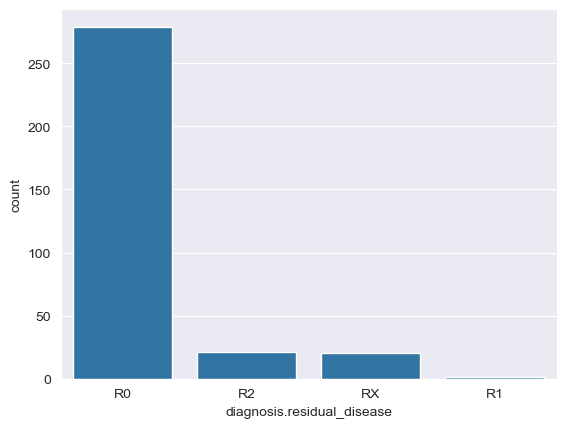

diagnosis.residual_disease
R0    279
R2     21
RX     20
R1      1
Name: count, dtype: int64


In [323]:
sns.countplot(data=merged_df, x='diagnosis.residual_disease')
plt.show()
print(merged_df['diagnosis.residual_disease'].value_counts())

In [321]:
merged_df['diagnosis.residual_disease']

0        R0
1        R0
2        R0
3      None
4        R0
       ... 
456    None
457    None
458      R0
459      R0
460    None
Name: diagnosis.residual_disease, Length: 461, dtype: object

In [276]:
merged_df.drop([
    'demographic.created_datetime',
    'demographic.year_of_birth',
    'exposures',
    'family.cancer_history_count',
    'treatment.intent_type',
    'project.project_id_x',
    'project.project_id_y',
    'case_id_x',
    'case_id_y',
    'demographic.submitter_id',
    'diagnosis.submitter_id',
    'updated_datetime',
    'demographic.updated_datetime',
    'pathology.updated_datetime',
    'pathology.created_datetime'
], axis=1, inplace=True)

In [277]:
merged_df.drop(['analyte.rna_integrity', 'demographic.days_to_death'], axis=1, inplace=True)

In [278]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   lost_to_followup                                308 non-null    object 
 1   disease_type                                    461 non-null    object 
 2   submitter_id                                    461 non-null    object 
 3   days_to_consent                                 437 non-null    float64
 4   diagnoses                                       461 non-null    object 
 5   consent_type                                    460 non-null    object 
 6   demographic.demographic_id                      461 non-null    object 
 7   demographic.ethnicity                           461 non-null    object 
 8   demographic.gender                              461 non-null    object 
 9   demographic.race                           

In [279]:
merged_df.to_csv('too_much_missing_rm.csv', index=False)

In [280]:
bioclen_df = merged_df[
    merged_df['diagnosis.residual_disease'].notna() &
    merged_df['slide.percent_tumor_cells'].notna()
]

In [281]:
bioclen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 16 to 453
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   lost_to_followup                                37 non-null     object 
 1   disease_type                                    49 non-null     object 
 2   submitter_id                                    49 non-null     object 
 3   days_to_consent                                 48 non-null     float64
 4   diagnoses                                       49 non-null     object 
 5   consent_type                                    49 non-null     object 
 6   demographic.demographic_id                      49 non-null     object 
 7   demographic.ethnicity                           49 non-null     object 
 8   demographic.gender                              49 non-null     object 
 9   demographic.race                                

In [282]:
temp_df = (merged_df.dropna(subset=['diagnosis.residual_disease'])).copy()

In [283]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   lost_to_followup                                226 non-null    object 
 1   disease_type                                    321 non-null    object 
 2   submitter_id                                    321 non-null    object 
 3   days_to_consent                                 318 non-null    float64
 4   diagnoses                                       321 non-null    object 
 5   consent_type                                    321 non-null    object 
 6   demographic.demographic_id                      321 non-null    object 
 7   demographic.ethnicity                           321 non-null    object 
 8   demographic.gender                              321 non-null    object 
 9   demographic.race                                

In [284]:
temp_df.to_csv('too_much_missing_rm_part2.csv', index=False)

In [285]:
drop_columns = [
    # High missing data (>30% missing)
    'demographic.country_of_residence_at_enrollment',  # If still high missing
    'analyte.a260_a280', 'diagnoses', 'treatments', 'pathology_details', 'samples', # If >30% missing
    
    # Administrative/ID fields  
    'submitter_id', 'demographic.demographic_id', 'days_to_consent',
    'consent_type', 'index_date', 'state', 'diagnosis.state', 
    'treatment.state', 'pathology.state', 'family.state',
    
    # Redundant fields
    'demographic.age_is_obfuscated', 'demographic.days_to_birth'
]


In [286]:
temp_df.drop(drop_columns, axis=1, inplace=True)

In [287]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lost_to_followup                  226 non-null    object 
 1   disease_type                      321 non-null    object 
 2   demographic.ethnicity             321 non-null    object 
 3   demographic.gender                321 non-null    object 
 4   demographic.race                  321 non-null    object 
 5   demographic.vital_status          321 non-null    object 
 6   demographic.age_at_index          321 non-null    float64
 7   demographic.state                 321 non-null    object 
 8   primary_site                      321 non-null    object 
 9   follow_ups                        321 non-null    object 
 10  family_histories                  278 non-null    object 
 11  diagnosis.synchronous_malignancy  321 non-null    object 
 12  diagnosis.pat

In [288]:
temp_df.drop(['slide.percent_tumor_cells', 'slide.percent_necrosis', 'slide.percent_normal_cells', 'slide.percent_tumor_nuclei', 'sample.intermediate_dimension', 'sample.shortest_dimension', 'sample.longest_dimension'], axis=1, inplace=True)

In [289]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lost_to_followup                  226 non-null    object 
 1   disease_type                      321 non-null    object 
 2   demographic.ethnicity             321 non-null    object 
 3   demographic.gender                321 non-null    object 
 4   demographic.race                  321 non-null    object 
 5   demographic.vital_status          321 non-null    object 
 6   demographic.age_at_index          321 non-null    float64
 7   demographic.state                 321 non-null    object 
 8   primary_site                      321 non-null    object 
 9   follow_ups                        321 non-null    object 
 10  family_histories                  278 non-null    object 
 11  diagnosis.synchronous_malignancy  321 non-null    object 
 12  diagnosis.pat

In [322]:
category_counts = temp_df['diagnosis.residual_disease'].value_counts()
print(category_counts)

diagnosis.residual_disease
R0    279
Rx     42
Name: count, dtype: int64


In [291]:
temp_df.to_csv('autoencoder_ready.csv', index=False)

In [292]:
temp_df

,lost_to_followup,disease_type,demographic.ethnicity,demographic.gender,demographic.race,demographic.vital_status,demographic.age_at_index,demographic.state,primary_site,follow_ups,...,portion.number,analyte.type,aliquot.quantity,aliquot.volume,aliquot.center,sample.composition,sample.specimen_type,sample.preservation_method,sample.is_ffpe,sample.tissue_type
0,Yes,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,77.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
1,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,72.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,22.0,NaN,NaN,NaN,NaN,Not Reported,Unknown,Unknown,False,Tumor
2,No,Adenomas and Adenocarcinomas,not reported,female,not reported,Alive,83.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,13.0,NaN,NaN,NaN,NaN,Not Reported,Solid Tissue,Unknown,False,Tumor
4,No,Adenomas and Adenocarcinomas,not reported,female,not reported,Alive,78.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,1.0,DNA,2.00,50.0,NaN,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
5,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,85.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,1.0,Repli-G (Qiagen) DNA,40.00,80.0,BCM,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,80.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,1.0,DNA,0.20,6.6,BI,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
453,No,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,80.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,1.0,DNA,3.74,26.7,JHU_USC,Not Reported,Solid Tissue,Unknown,False,Tumor
454,NaN,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,78.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
458,NaN,Adenomas and Adenocarcinomas,not reported,female,not reported,Dead,78.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,NaN,NaN,NaN,NaN,NaN,Not Reported,Unknown,Unknown,False,Tumor


In [293]:
temp_df.loc[
    (temp_df['diagnosis.residual_disease'] != 'R0') & (temp_df['diagnosis.residual_disease'].notna()),
    'diagnosis.residual_disease'
] = 'Rx'

In [294]:
features_to_remove = [
    # Complex/Nested JSON-like columns
    'follow_ups',
    'family_histories',
    'molecular_tests', # This column appears in some files, added for safety

    # Redundant, high cardinality, or uninformative diagnosis fields
    'diagnosis.year_of_diagnosis',
    'diagnosis.classification',

    # Sample processing and metadata columns (no biological meaning for prediction)
    'sample.type',
    'portion.weight',
    'portion.is_ffpe',
    'portion.number',
    'analyte.type',
    'sample.composition',
    'sample.specimen_type',
    'sample.preservation_method',
    'sample.is_ffpe',

    'treatment.therapy_flag',

    'family.primary_diagnosis',
    'demographic.state',
    'demographic.ethnicity',
    'demographic.race',
    'lost_to_followup'
]

In [295]:
temp_df_cleaned = (temp_df.drop(columns=features_to_remove, errors='ignore').copy())

In [296]:
temp_df_cleaned

,disease_type,demographic.gender,demographic.vital_status,demographic.age_at_index,primary_site,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage,diagnosis.organ_of_origin,diagnosis.primary_diagnosis,diagnosis.prior_malignancy,...,pathology.consistent_review,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.vascular_invasion,pathology.lymphatic_invasion,family.relative_with_cancer,aliquot.quantity,aliquot.volume,aliquot.center,sample.tissue_type
0,Adenomas and Adenocarcinomas,female,Alive,77.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,8.0,No,No,None,NaN,NaN,NaN,Tumor
1,Adenomas and Adenocarcinomas,male,Alive,72.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,Not Reported,NaN,50.0,No,No,no,NaN,NaN,NaN,Tumor
2,Adenomas and Adenocarcinomas,female,Alive,83.0,Colon,No,Stage IIIC,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,32.0,40.0,No,Yes,no,NaN,NaN,NaN,Tumor
4,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage I,"Colon, NOS","Adenocarcinoma, NOS",no,...,Not Reported,0.0,23.0,No,No,no,2.00,50.0,NaN,Normal
5,Adenomas and Adenocarcinomas,male,Alive,85.0,Colon,No,Stage II,Sigmoid colon,"Adenocarcinoma, NOS",yes,...,Not Reported,0.0,28.0,No,No,no,40.00,80.0,BCM,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Adenomas and Adenocarcinomas,male,Alive,80.0,Colon,No,Stage I,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,17.0,No,No,yes,0.20,6.6,BI,Normal
453,Adenomas and Adenocarcinomas,female,Alive,80.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,21.0,No,No,no,3.74,26.7,JHU_USC,Tumor
454,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage IIIB,Cecum,"Adenocarcinoma, NOS",no,...,Yes,4.0,17.0,No,No,no,NaN,NaN,NaN,Tumor
458,Adenomas and Adenocarcinomas,female,Dead,78.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,Not Reported,0.0,18.0,No,No,no,NaN,NaN,NaN,Tumor


In [297]:
temp_df

,lost_to_followup,disease_type,demographic.ethnicity,demographic.gender,demographic.race,demographic.vital_status,demographic.age_at_index,demographic.state,primary_site,follow_ups,...,portion.number,analyte.type,aliquot.quantity,aliquot.volume,aliquot.center,sample.composition,sample.specimen_type,sample.preservation_method,sample.is_ffpe,sample.tissue_type
0,Yes,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,77.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
1,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,72.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,22.0,NaN,NaN,NaN,NaN,Not Reported,Unknown,Unknown,False,Tumor
2,No,Adenomas and Adenocarcinomas,not reported,female,not reported,Alive,83.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,13.0,NaN,NaN,NaN,NaN,Not Reported,Solid Tissue,Unknown,False,Tumor
4,No,Adenomas and Adenocarcinomas,not reported,female,not reported,Alive,78.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,1.0,DNA,2.00,50.0,NaN,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
5,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,85.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,1.0,Repli-G (Qiagen) DNA,40.00,80.0,BCM,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,No,Adenomas and Adenocarcinomas,not reported,male,not reported,Alive,80.0,released,Colon,"[{'timepoint_category': 'Follow-up', 'follow_u...",...,1.0,DNA,0.20,6.6,BI,Not Reported,Peripheral Blood NOS,Unknown,False,Normal
453,No,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,80.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,1.0,DNA,3.74,26.7,JHU_USC,Not Reported,Solid Tissue,Unknown,False,Tumor
454,NaN,Adenomas and Adenocarcinomas,not hispanic or latino,female,white,Alive,78.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,NaN,NaN,NaN,NaN,NaN,NaN,Solid Tissue,FFPE,True,Tumor
458,NaN,Adenomas and Adenocarcinomas,not reported,female,not reported,Dead,78.0,released,Colon,"[{'timepoint_category': 'Last Contact', 'follo...",...,NaN,NaN,NaN,NaN,NaN,Not Reported,Unknown,Unknown,False,Tumor


In [298]:
temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   disease_type                      321 non-null    object 
 1   demographic.gender                321 non-null    object 
 2   demographic.vital_status          321 non-null    object 
 3   demographic.age_at_index          321 non-null    float64
 4   primary_site                      321 non-null    object 
 5   diagnosis.synchronous_malignancy  321 non-null    object 
 6   diagnosis.pathologic_stage        318 non-null    object 
 7   diagnosis.organ_of_origin         321 non-null    object 
 8   diagnosis.primary_diagnosis       321 non-null    object 
 9   diagnosis.prior_malignancy        321 non-null    object 
 10  diagnosis.prior_treatment         321 non-null    object 
 11  diagnosis.is_primary_disease      321 non-null    object 
 12  diagnosis.ajc

In [299]:
temp_df_cleaned.loc[
    (temp_df_cleaned['pathology.consistent_review'] == 'Not Reported'),
    'pathology.consistent_review'
] = np.nan

In [300]:
temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   disease_type                      321 non-null    object 
 1   demographic.gender                321 non-null    object 
 2   demographic.vital_status          321 non-null    object 
 3   demographic.age_at_index          321 non-null    float64
 4   primary_site                      321 non-null    object 
 5   diagnosis.synchronous_malignancy  321 non-null    object 
 6   diagnosis.pathologic_stage        318 non-null    object 
 7   diagnosis.organ_of_origin         321 non-null    object 
 8   diagnosis.primary_diagnosis       321 non-null    object 
 9   diagnosis.prior_malignancy        321 non-null    object 
 10  diagnosis.prior_treatment         321 non-null    object 
 11  diagnosis.is_primary_disease      321 non-null    object 
 12  diagnosis.ajc

In [301]:
temp_df_cleaned

,disease_type,demographic.gender,demographic.vital_status,demographic.age_at_index,primary_site,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage,diagnosis.organ_of_origin,diagnosis.primary_diagnosis,diagnosis.prior_malignancy,...,pathology.consistent_review,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.vascular_invasion,pathology.lymphatic_invasion,family.relative_with_cancer,aliquot.quantity,aliquot.volume,aliquot.center,sample.tissue_type
0,Adenomas and Adenocarcinomas,female,Alive,77.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,8.0,No,No,None,NaN,NaN,NaN,Tumor
1,Adenomas and Adenocarcinomas,male,Alive,72.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,NaN,NaN,50.0,No,No,no,NaN,NaN,NaN,Tumor
2,Adenomas and Adenocarcinomas,female,Alive,83.0,Colon,No,Stage IIIC,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,32.0,40.0,No,Yes,no,NaN,NaN,NaN,Tumor
4,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage I,"Colon, NOS","Adenocarcinoma, NOS",no,...,NaN,0.0,23.0,No,No,no,2.00,50.0,NaN,Normal
5,Adenomas and Adenocarcinomas,male,Alive,85.0,Colon,No,Stage II,Sigmoid colon,"Adenocarcinoma, NOS",yes,...,NaN,0.0,28.0,No,No,no,40.00,80.0,BCM,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Adenomas and Adenocarcinomas,male,Alive,80.0,Colon,No,Stage I,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,17.0,No,No,yes,0.20,6.6,BI,Normal
453,Adenomas and Adenocarcinomas,female,Alive,80.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,Yes,0.0,21.0,No,No,no,3.74,26.7,JHU_USC,Tumor
454,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage IIIB,Cecum,"Adenocarcinoma, NOS",no,...,Yes,4.0,17.0,No,No,no,NaN,NaN,NaN,Tumor
458,Adenomas and Adenocarcinomas,female,Dead,78.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,NaN,0.0,18.0,No,No,no,NaN,NaN,NaN,Tumor


In [302]:
for col in temp_df_cleaned.columns:
    print(f"{col} - {temp_df_cleaned[col].unique()}")

disease_type - ['Adenomas and Adenocarcinomas' 'Cystic, Mucinous and Serous Neoplasms'
 'Complex Epithelial Neoplasms' 'Epithelial Neoplasms, NOS']
demographic.gender - ['female' 'male']
demographic.vital_status - ['Alive' 'Dead']
demographic.age_at_index - [77. 72. 83. 78. 85. 66. 46. 70. 50. 63. 82. 76. 59. 64. 79. 81. 67. 73.
 80. 58. 74. 69. 65. 54. 84. 41. 45. 68. 57. 89. 42. 49. 51. 40. 47. 71.
 61. 36. 43. 56. 75. 48. 53. 39. 37. 60. 38. 86. 52. 55. 88. 87. 44. 34.
 62.]
primary_site - ['Colon' 'Rectosigmoid junction']
diagnosis.synchronous_malignancy - ['No' 'Yes']
diagnosis.pathologic_stage - ['Stage IIA' 'Stage IIIC' 'Stage I' 'Stage II' 'Stage IVB' 'Stage IIB'
 'Stage IIIB' 'Stage III' 'Stage IIIA' 'Stage IA' 'Stage IV' 'Stage IVA'
 None]
diagnosis.organ_of_origin - ['Sigmoid colon' 'Colon, NOS' 'Transverse colon' 'Descending colon'
 'Ascending colon' 'Cecum' 'Rectosigmoid junction'
 'Splenic flexure of colon' 'Hepatic flexure of colon']
diagnosis.primary_diagnosis - ['Adeno

In [303]:
missing_value_placeholders = [None, 'None', 'nan', 'Unknown', 'not reported']
# for placeholder in missing_value_placeholders:
temp_df_cleaned.replace(missing_value_placeholders, np.nan, inplace=True)

In [304]:
temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   disease_type                      321 non-null    object 
 1   demographic.gender                321 non-null    object 
 2   demographic.vital_status          321 non-null    object 
 3   demographic.age_at_index          321 non-null    float64
 4   primary_site                      321 non-null    object 
 5   diagnosis.synchronous_malignancy  321 non-null    object 
 6   diagnosis.pathologic_stage        318 non-null    object 
 7   diagnosis.organ_of_origin         321 non-null    object 
 8   diagnosis.primary_diagnosis       321 non-null    object 
 9   diagnosis.prior_malignancy        320 non-null    object 
 10  diagnosis.prior_treatment         321 non-null    object 
 11  diagnosis.is_primary_disease      321 non-null    object 
 12  diagnosis.ajc

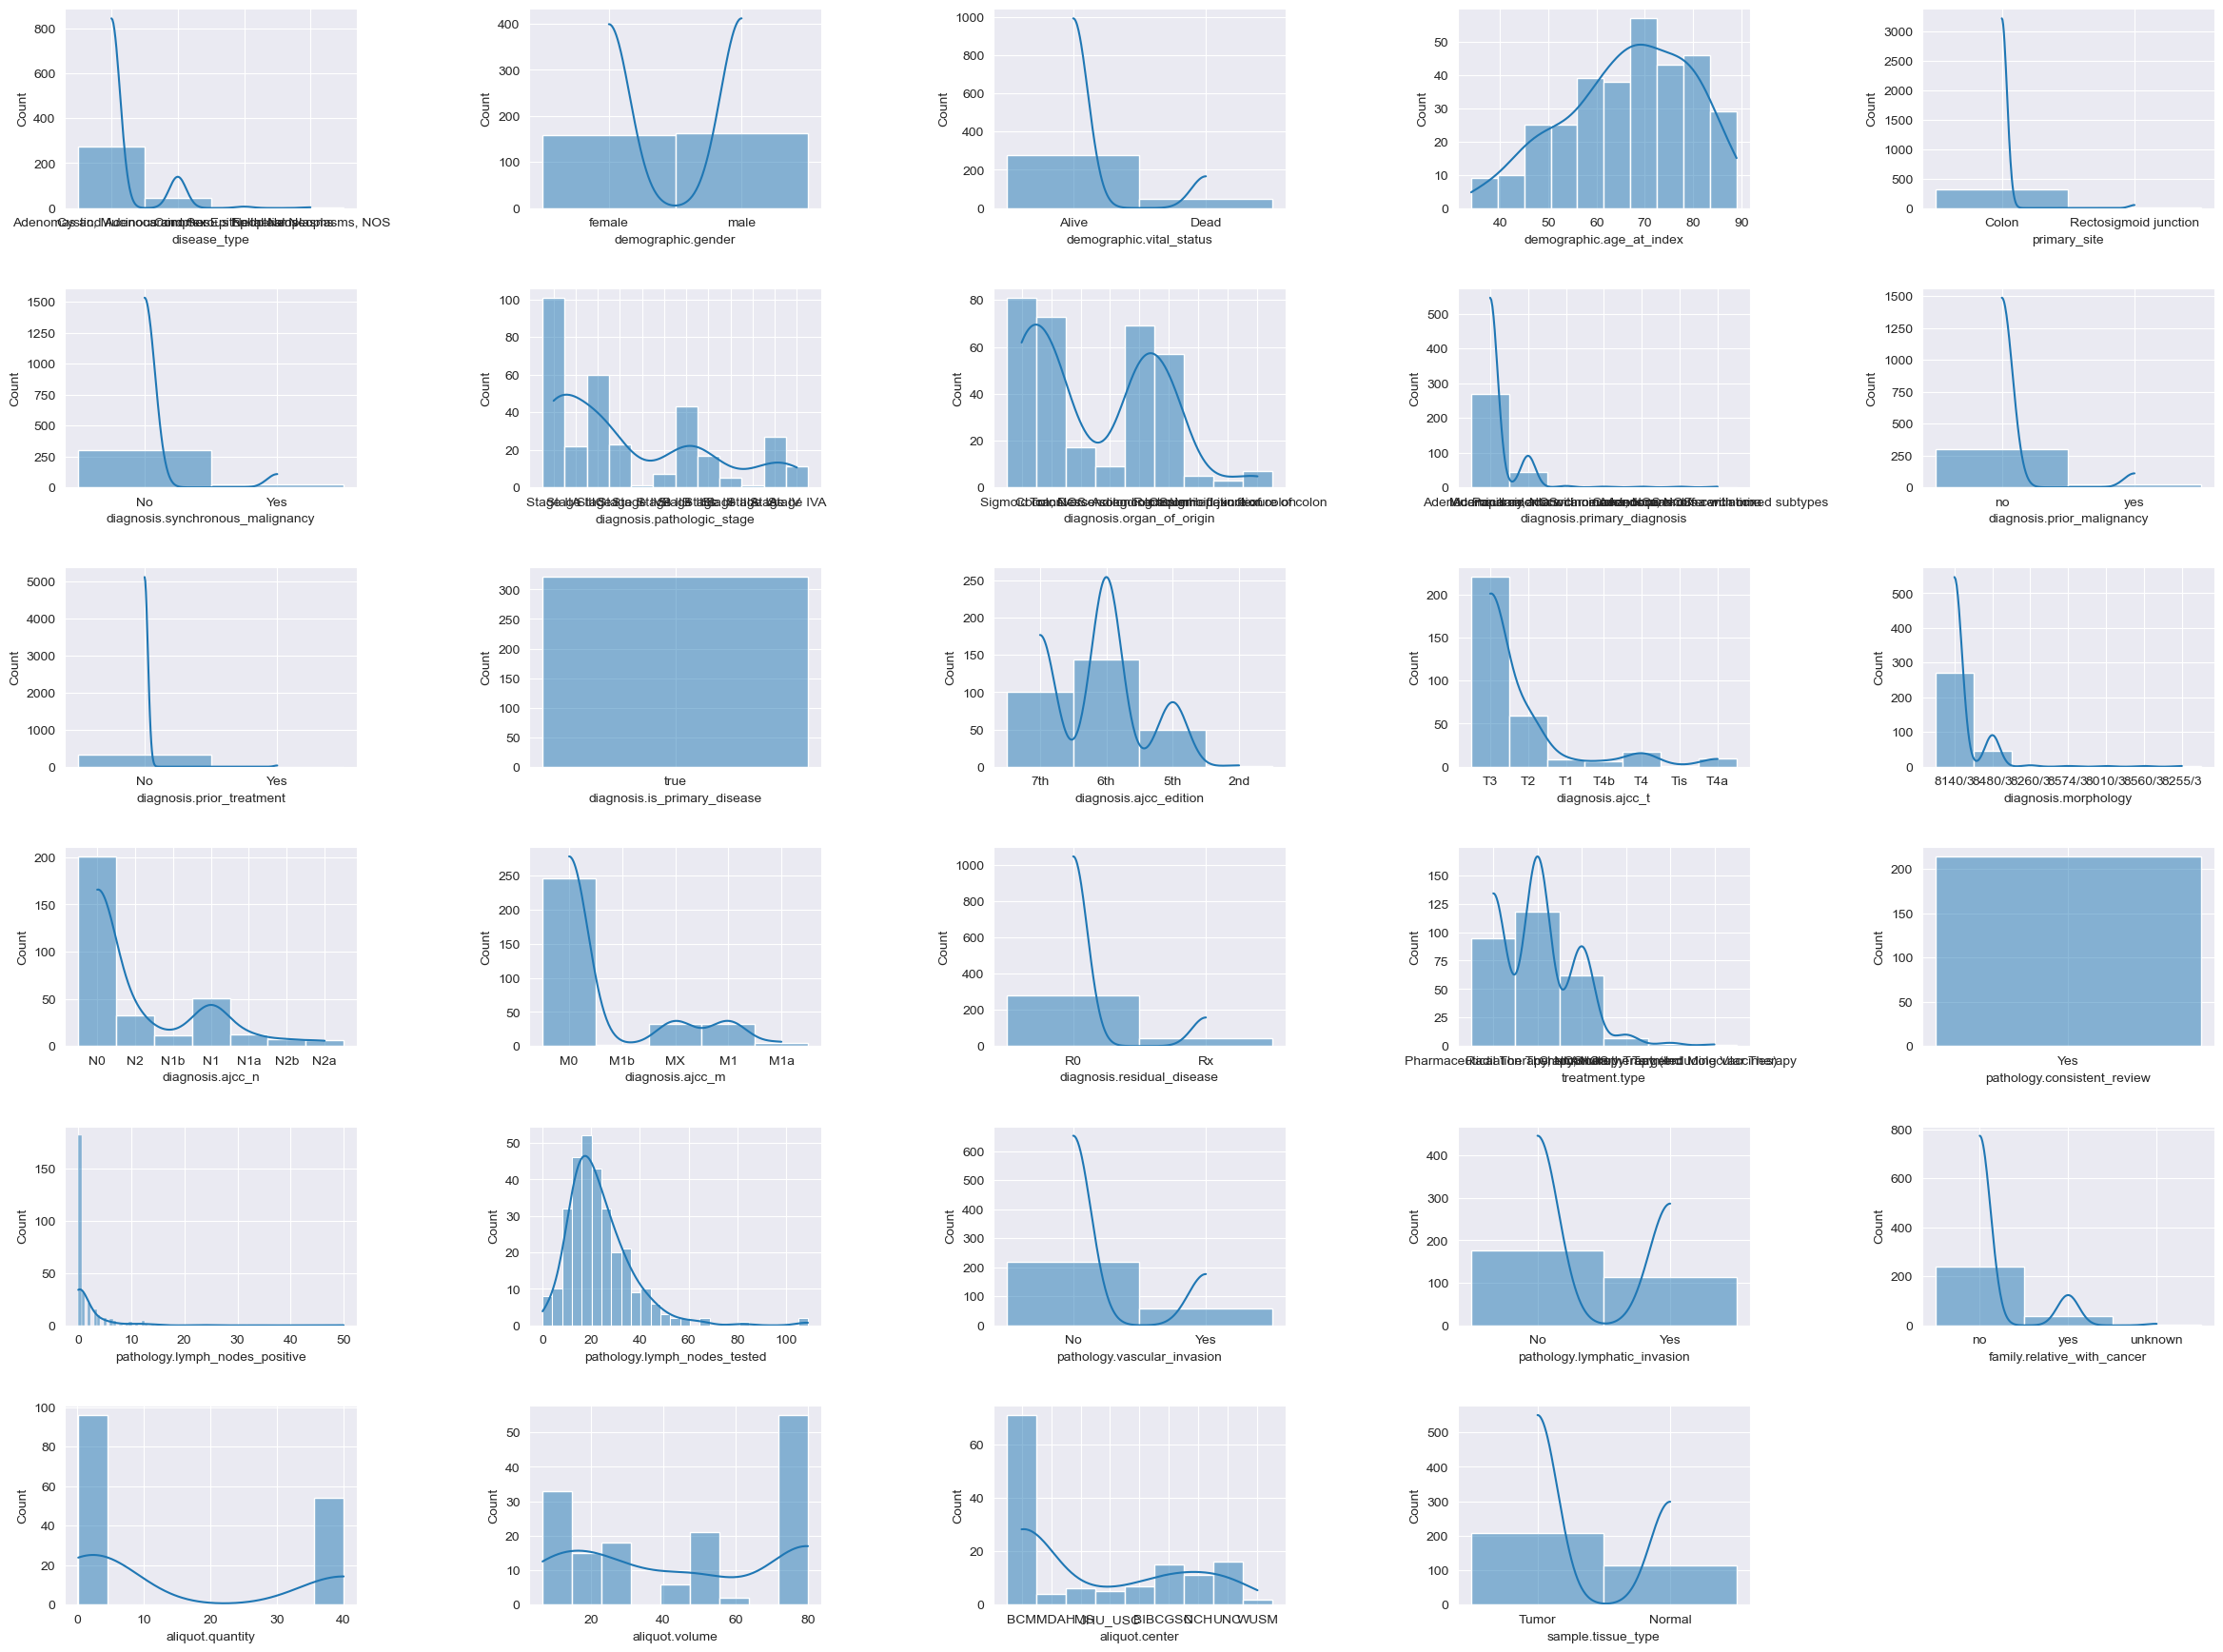

In [305]:
features_to_plot = temp_df_cleaned.columns

plt.figure(figsize=(24, 18))  # Increase width & height

for i, feat in enumerate(features_to_plot):
    plt.subplot(6, 5, i + 1)  # 6 rows, 5 cols
    sns.histplot(temp_df_cleaned[feat], kde=True)
    plt.xlabel(feat)

plt.tight_layout(pad=3)  # add spacing
plt.show()

In [306]:
temp_df_cleaned[temp_df_cleaned['pathology.lymph_nodes_tested'] == 0]

,disease_type,demographic.gender,demographic.vital_status,demographic.age_at_index,primary_site,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage,diagnosis.organ_of_origin,diagnosis.primary_diagnosis,diagnosis.prior_malignancy,...,pathology.consistent_review,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.vascular_invasion,pathology.lymphatic_invasion,family.relative_with_cancer,aliquot.quantity,aliquot.volume,aliquot.center,sample.tissue_type
401,Adenomas and Adenocarcinomas,male,Alive,61.0,Colon,No,Stage IIA,Cecum,"Adenocarcinoma, NOS",no,...,Yes,NaN,0.0,No,No,no,40.0,80.0,BCM,Normal


In [307]:
temp_df_cleaned['pathology.lymph_nodes_positive_ratio'] = (temp_df_cleaned['pathology.lymph_nodes_positive']/temp_df_cleaned['pathology.lymph_nodes_tested']).replace(0, np.nan)
temp_df_cleaned['pathology.lymph_nodes_positive_ratio'] = temp_df_cleaned['pathology.lymph_nodes_positive_ratio'].fillna(0)
temp_df_cleaned

,disease_type,demographic.gender,demographic.vital_status,demographic.age_at_index,primary_site,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage,diagnosis.organ_of_origin,diagnosis.primary_diagnosis,diagnosis.prior_malignancy,...,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.vascular_invasion,pathology.lymphatic_invasion,family.relative_with_cancer,aliquot.quantity,aliquot.volume,aliquot.center,sample.tissue_type,pathology.lymph_nodes_positive_ratio
0,Adenomas and Adenocarcinomas,female,Alive,77.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,0.0,8.0,No,No,NaN,NaN,NaN,NaN,Tumor,0.000000
1,Adenomas and Adenocarcinomas,male,Alive,72.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,NaN,50.0,No,No,no,NaN,NaN,NaN,Tumor,0.000000
2,Adenomas and Adenocarcinomas,female,Alive,83.0,Colon,No,Stage IIIC,Sigmoid colon,"Adenocarcinoma, NOS",no,...,32.0,40.0,No,Yes,no,NaN,NaN,NaN,Tumor,0.800000
4,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage I,"Colon, NOS","Adenocarcinoma, NOS",no,...,0.0,23.0,No,No,no,2.00,50.0,NaN,Normal,0.000000
5,Adenomas and Adenocarcinomas,male,Alive,85.0,Colon,No,Stage II,Sigmoid colon,"Adenocarcinoma, NOS",yes,...,0.0,28.0,No,No,no,40.00,80.0,BCM,Normal,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Adenomas and Adenocarcinomas,male,Alive,80.0,Colon,No,Stage I,Sigmoid colon,"Adenocarcinoma, NOS",no,...,0.0,17.0,No,No,yes,0.20,6.6,BI,Normal,0.000000
453,Adenomas and Adenocarcinomas,female,Alive,80.0,Colon,No,Stage IIA,Sigmoid colon,"Adenocarcinoma, NOS",no,...,0.0,21.0,No,No,no,3.74,26.7,JHU_USC,Tumor,0.000000
454,Adenomas and Adenocarcinomas,female,Alive,78.0,Colon,No,Stage IIIB,Cecum,"Adenocarcinoma, NOS",no,...,4.0,17.0,No,No,no,NaN,NaN,NaN,Tumor,0.235294
458,Adenomas and Adenocarcinomas,female,Dead,78.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,0.0,18.0,No,No,no,NaN,NaN,NaN,Tumor,0.000000


In [308]:
df = temp_df_cleaned.copy()

In [309]:
temp_df_cleaned[temp_df_cleaned['diagnosis.residual_disease'] == 'Rx']

,disease_type,demographic.gender,demographic.vital_status,demographic.age_at_index,primary_site,diagnosis.synchronous_malignancy,diagnosis.pathologic_stage,diagnosis.organ_of_origin,diagnosis.primary_diagnosis,diagnosis.prior_malignancy,...,pathology.lymph_nodes_positive,pathology.lymph_nodes_tested,pathology.vascular_invasion,pathology.lymphatic_invasion,family.relative_with_cancer,aliquot.quantity,aliquot.volume,aliquot.center,sample.tissue_type,pathology.lymph_nodes_positive_ratio
30,Adenomas and Adenocarcinomas,male,Dead,50.0,Colon,No,Stage IV,Ascending colon,"Adenocarcinoma, NOS",no,...,7.0,20.0,Yes,Yes,yes,40.00,80.00,BCM,Normal,0.350000
56,Adenomas and Adenocarcinomas,male,Alive,45.0,Colon,No,Stage IV,"Colon, NOS","Adenocarcinoma, NOS",no,...,23.0,29.0,Yes,Yes,no,2.00,50.00,NaN,Normal,0.793103
61,Adenomas and Adenocarcinomas,female,Alive,63.0,Colon,No,Stage IV,Cecum,"Adenocarcinoma, NOS",no,...,6.0,33.0,No,Yes,no,NaN,NaN,NaN,Tumor,0.181818
65,"Cystic, Mucinous and Serous Neoplasms",male,Alive,57.0,Colon,No,Stage IIA,Ascending colon,Mucinous adenocarcinoma,no,...,NaN,NaN,NaN,NaN,NaN,40.00,80.00,BCM,Normal,0.000000
68,Adenomas and Adenocarcinomas,female,Alive,42.0,Colon,No,Stage IIA,"Colon, NOS","Adenocarcinoma, NOS",no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCH,Normal,0.000000
80,Adenomas and Adenocarcinomas,male,Alive,80.0,Colon,No,Stage IV,"Colon, NOS","Adenocarcinoma, NOS",yes,...,2.0,13.0,No,Yes,yes,NaN,NaN,NaN,Tumor,0.153846
94,Adenomas and Adenocarcinomas,female,Alive,77.0,Colon,No,Stage IV,Sigmoid colon,"Adenocarcinoma, NOS",no,...,2.0,17.0,No,Yes,no,4.00,8.00,BCM,Normal,0.117647
97,Adenomas and Adenocarcinomas,female,Dead,82.0,Colon,No,Stage IV,Cecum,"Adenocarcinoma, NOS",no,...,4.0,16.0,Yes,Yes,no,NaN,NaN,NaN,Tumor,0.250000
101,Adenomas and Adenocarcinomas,female,Alive,58.0,Colon,No,Stage IIA,Ascending colon,"Adenocarcinoma, NOS",no,...,NaN,NaN,No,No,NaN,NaN,NaN,NaN,Tumor,0.000000
104,Adenomas and Adenocarcinomas,female,Dead,71.0,Colon,No,Stage I,Ascending colon,"Adenocarcinoma, NOS",no,...,NaN,NaN,No,Yes,NaN,2.00,50.00,NaN,Tumor,0.000000


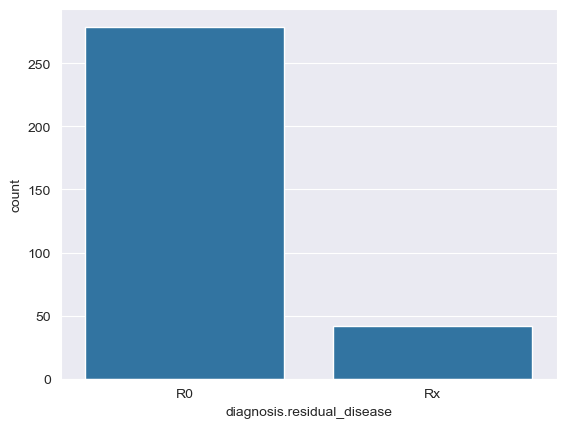

In [310]:
sns.countplot(data=df, x='diagnosis.residual_disease')
plt.show()

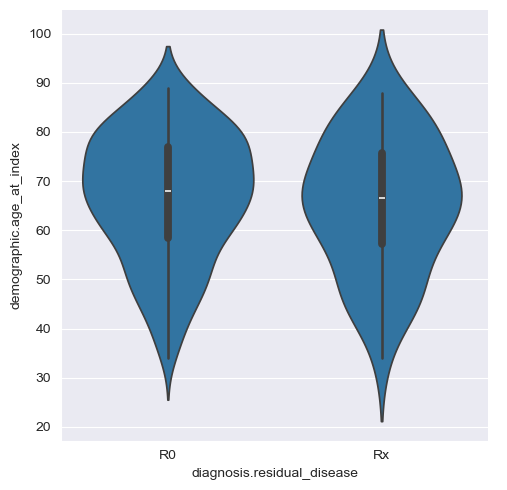

In [311]:
sns.catplot(data=df, x='diagnosis.residual_disease', y='demographic.age_at_index', kind='violin')

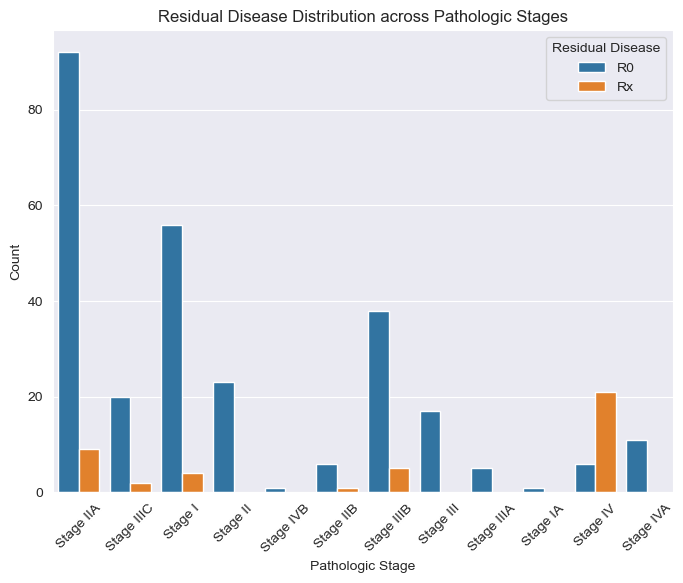

In [312]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="diagnosis.pathologic_stage", hue="diagnosis.residual_disease")
plt.title("Residual Disease Distribution across Pathologic Stages")
plt.xlabel("Pathologic Stage")
plt.ylabel("Count")
plt.legend(title="Residual Disease")
plt.xticks(rotation=45)
plt.show()

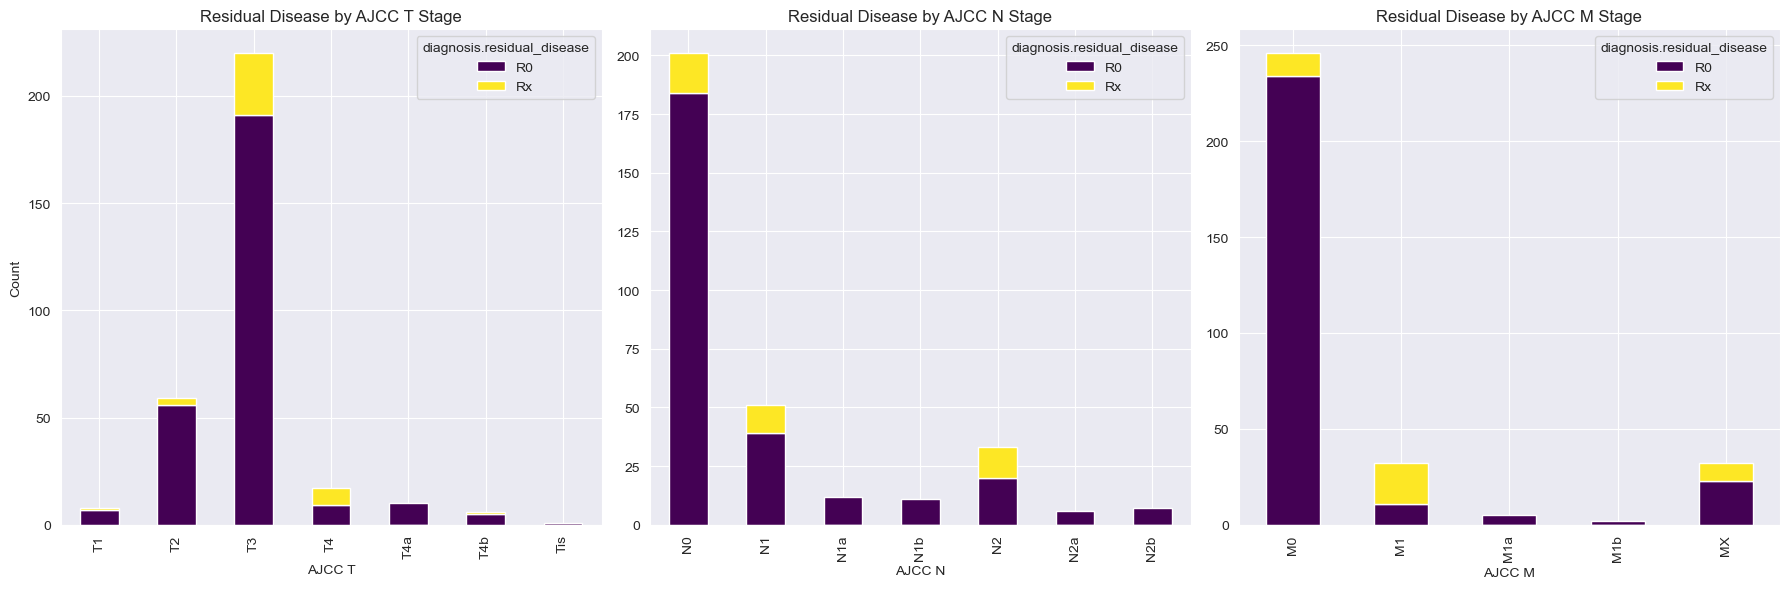

In [313]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# AJCC T
ct_t = pd.crosstab(df["diagnosis.ajcc_t"], df["diagnosis.residual_disease"])
ct_t.plot(kind="bar", stacked=True, ax=axes[0], colormap="viridis")
axes[0].set_title("Residual Disease by AJCC T Stage")
axes[0].set_xlabel("AJCC T")
axes[0].set_ylabel("Count")

# AJCC N
ct_n = pd.crosstab(df["diagnosis.ajcc_n"], df["diagnosis.residual_disease"])
ct_n.plot(kind="bar", stacked=True, ax=axes[1], colormap="viridis")
axes[1].set_title("Residual Disease by AJCC N Stage")
axes[1].set_xlabel("AJCC N")

# AJCC M
ct_m = pd.crosstab(df["diagnosis.ajcc_m"], df["diagnosis.residual_disease"])
ct_m.plot(kind="bar", stacked=True, ax=axes[2], colormap="viridis")
axes[2].set_title("Residual Disease by AJCC M Stage")
axes[2].set_xlabel("AJCC M")

plt.tight_layout()
plt.show()

In [314]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# --- 0. Column splits ---
num_cols = [
    'demographic.age_at_index',
    'pathology.lymph_nodes_positive',
    'pathology.lymph_nodes_tested',
    'aliquot.quantity',
    'aliquot.volume',
    'pathology.lymph_nodes_positive_ratio'
]
cat_cols = [col for col in df.columns if col not in num_cols]

In [315]:
'''
# --- 1. Handle categorical NaNs BEFORE encoding ---
df[cat_cols] = df[cat_cols].fillna("Unknown")

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cats = encoder.fit_transform(df[cat_cols])

# Get numerical features (with NaNs still present for VAE to impute)
X_nums = df[num_cols].values

# Combine numerical + categorical
X_raw = np.hstack([X_nums, X_cats])

# --- 2. Scaling ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

# Mask (1 = observed, 0 = missing) – only for numerical part
mask_nums = ~np.isnan(X_nums)
mask_cats = np.ones_like(X_cats, dtype=bool)   # cats have no NaNs after fillna
mask = np.hstack([mask_nums, mask_cats])

# Replace NaNs in scaled data with 0 for training
X_filled = np.nan_to_num(X_scaled, nan=0.0)

# --- 3. VAE definition ---
class VAE(Model):
    def __init__(self, input_dim, latent_dim, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Encoder
        encoder_inputs = layers.Input(shape=(input_dim,))
        h = layers.Dense(64, activation="relu")(encoder_inputs)
        z_mean = layers.Dense(latent_dim, name="z_mean")(h)
        z_log_var = layers.Dense(latent_dim, name="z_log_var")(h)
        self.encoder = Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

        # Decoder
        latent_inputs = layers.Input(shape=(latent_dim,))
        h_dec = layers.Dense(64, activation="relu")(latent_inputs)
        decoder_outputs = layers.Dense(input_dim, activation="sigmoid")(h_dec)
        self.decoder = Model(latent_inputs, decoder_outputs, name="decoder")

        # Trackers
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = tf.keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.recon_loss_tracker, self.kl_loss_tracker]

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sampling([z_mean, z_log_var])
        return self.decoder(z)

    def sampling(self, args):
        z_mean, z_log_var = args
        eps = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def train_step(self, data):
        x, mask = data
        x = tf.cast(x, tf.float32)
        mask = tf.cast(mask, tf.float32)

        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(x)
            z = self.sampling([z_mean, z_log_var])
            reconstruction = self.decoder(z)

            # Masked reconstruction loss
            recon_loss = tf.reduce_sum(tf.square((x - reconstruction) * mask)) / tf.reduce_sum(mask)

            # KL divergence
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))

            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

# --- 4. Train VAE ---
input_dim = X_filled.shape[1]
latent_dim = 10
vae = VAE(input_dim, latent_dim)
vae.compile(optimizer=optimizers.Adam())

vae.fit(
    x=X_filled.astype("float32"),
    y=mask.astype("float32"),
    epochs=50,
    batch_size=32,
    verbose=1
)

# --- 5. Impute ---
X_reconstructed_scaled = vae.predict(X_filled)
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

# Only fill NaNs in numerical part
X_imputed = np.where(np.isnan(X_raw), X_reconstructed, X_raw)

# --- 6. Rebuild DataFrame ---
ohe_feature_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(ohe_feature_names)
X_df = pd.DataFrame(X_imputed, columns=all_feature_names)

'''

'\n# --- 1. Handle categorical NaNs BEFORE encoding ---\ndf[cat_cols] = df[cat_cols].fillna("Unknown")\n\n# One-hot encode categorical features\nencoder = OneHotEncoder(sparse_output=False, handle_unknown=\'ignore\')\nX_cats = encoder.fit_transform(df[cat_cols])\n\n# Get numerical features (with NaNs still present for VAE to impute)\nX_nums = df[num_cols].values\n\n# Combine numerical + categorical\nX_raw = np.hstack([X_nums, X_cats])\n\n# --- 2. Scaling ---\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X_raw)\n\n# Mask (1 = observed, 0 = missing) – only for numerical part\nmask_nums = ~np.isnan(X_nums)\nmask_cats = np.ones_like(X_cats, dtype=bool)   # cats have no NaNs after fillna\nmask = np.hstack([mask_nums, mask_cats])\n\n# Replace NaNs in scaled data with 0 for training\nX_filled = np.nan_to_num(X_scaled, nan=0.0)\n\n# --- 3. VAE definition ---\nclass VAE(Model):\n    def __init__(self, input_dim, latent_dim, **kwargs):\n        super(VAE, self).__init__(**kwargs)\n  

In [316]:
len(cat_cols)

24

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 459
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   disease_type                          321 non-null    object 
 1   demographic.gender                    321 non-null    object 
 2   demographic.vital_status              321 non-null    object 
 3   demographic.age_at_index              321 non-null    float64
 4   primary_site                          321 non-null    object 
 5   diagnosis.synchronous_malignancy      321 non-null    object 
 6   diagnosis.pathologic_stage            318 non-null    object 
 7   diagnosis.organ_of_origin             321 non-null    object 
 8   diagnosis.primary_diagnosis           321 non-null    object 
 9   diagnosis.prior_malignancy            320 non-null    object 
 10  diagnosis.prior_treatment             321 non-null    object 
 11  diagnosis.is_primary_dis